# Phase 2: Classifier

In [ ]:
!pip install git+https://github.com/marcoancona/DeepExplain

  Cloning https://github.com/marcoancona/DeepExplain to /tmp/pip-req-build-8z1nv_n_
  Running command git clone -q https://github.com/marcoancona/DeepExplain /tmp/pip-req-build-8z1nv_n_
  Created wheel for deepexplain: filename=deepexplain-0.3-py3-none-any.whl size=15267 sha256=b7e92d5ef996a140b01bf23a8c13389b7b8c4b8db76398510574ba94a56203fa
  Stored in directory: /tmp/pip-ephem-wheel-cache-v8vk3eva/wheels/53/bd/cf/566f3b117316e1824a52d43305815a2344cddbc8d48d229732
Successfully built deepexplain


In [ ]:
!pip install kneed

In [ ]:
!pip install shap==0.31

     |████████████████████████████████| 257 kB 4.2 MB/s 
  Created wheel for shap: filename=shap-0.31.0-cp37-cp37m-linux_x86_64.whl size=376221 sha256=986d605400aa2b0b9efb04d9ac0dcddd62785138fdc87ceb30e0f6966b83b4f3
  Stored in directory: /root/.cache/pip/wheels/f1/e0/e4/0c670bf789cae536859d1fec4a4e6bac5de1eb99521e9eb487
Successfully built shap


In [ ]:
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 4.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/methylation')

Mounted at /content/drive/


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorflow_version 1
#Start tensorboard
%tensorboard — logdir logs
%load_ext autoreload
%autoreload 2
import warnings
warnings.simplefilter('ignore')

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--host ADDR]
                   [--port PORT] [--purge_orphaned_data BOOL] [--db URI]
                   [--db_import] [--inspect] [--version_tb] [--tag TAG]
                   [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT] [--master_tpu_unsecure_channel ADDR]
                   [--whatif-use-unsafe-custom-prediction YOUR_CUSTOM_PREDICT_FUNCTION.py]
                   [--whatif-data-dir PATH]
tensorboard: error: unrecognized ar

In [ ]:
seed = 999999
import random
random.seed(seed)
import numpy as np
np.random.seed(seed)

In [ ]:
%matplotlib inline  

import imp
import numpy as np
import os
import keras
import keras.backend
import keras.models
import sklearn
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras import regularizers
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.utils import plot_model
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import keras.models as mod
from keras.callbacks import EarlyStopping, ModelCheckpoint 
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import TensorBoard
from keras.utils.vis_utils import plot_model
from sklearn.externals import joblib

Using TensorFlow backend.


In [ ]:
%tensorflow_version 1
seed=999999

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
seed=999999    #Initially 0
np.random.seed(seed)
df = pd.read_csv('dataset/genelevelMethyl.csv', index_col=0)
df = df.reindex(sorted(df.columns), axis=1)
df=df.T
print("CNV Matrix Before:", df.shape)

df2=pd.read_csv('./dataset/BRCA_clinicalMatrix.gz',compression='gzip',sep='\t',index_col=0)
df2.index = pd.Series({x: x.replace('-', '.') for x in df2.index})
print("Clinical Data Before:", df2.shape)
k=df2.columns.get_loc('PAM50Call_RNAseq')
df2=df2[df2.iloc[:,k].isna()==False]

commonIndexes=np.sort(list(set(df2.index).intersection(set(df.index)))) 
df=df.loc[commonIndexes]
df2=df2.loc[commonIndexes] 

print("CNV After:", df.shape)
print("Clinical Data After:", df2.shape)
print("CNV and Clinical Data corresponds to same Patients: ", False if False in (df.index==df2.index) else True)
unique_elements, counts_elements = np.unique(df2.iloc[:,k], return_counts=True)
print("Labels", unique_elements, counts_elements)

CNV Matrix Before: (888, 22382)
Clinical Data Before: (1247, 202)
CNV After: (620, 22382)
Clinical Data After: (620, 202)
CNV and Clinical Data corresponds to same Patients:  True
Labels ['Basal' 'Her2' 'LumA' 'LumB' 'Normal'] [ 87  31 288 127  87]


In [ ]:
X=np.array(df.values)

In [ ]:
#Encoding labels to numerical  values

Y_temp=np.array(df2.values[:,k])
print("TARGET LABEL SIZE BEFORE: ", Y_temp.shape)
label_encoder=LabelEncoder()
Y=label_encoder.fit_transform(Y_temp)
print("TARGET LABEL SIZE BEFORE: ", Y.shape)
print("Labels before and after:", Y_temp[0:9], Y[0:9])
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

TARGET LABEL SIZE BEFORE:  (620,)
TARGET LABEL SIZE BEFORE:  (620,)
Labels before and after: ['Normal' 'LumA' 'LumA' 'LumA' 'LumA' 'LumB' 'LumA' 'Basal' 'LumA'] [4 2 2 2 2 3 2 0 2]
{'Basal': 0, 'Her2': 1, 'LumA': 2, 'LumB': 3, 'Normal': 4}


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
Y = Y.reshape(len(Y), 1)
Y_onehot = onehot_encoder.fit_transform(Y)
print(Y_onehot.shape)

(620, 5)


In [ ]:
sm=SMOTE(random_state=seed)
#X_train1, Y_train1 = X_train, Y_train
#X_train, X_val,Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=seed)

X_train_res, Y_train_res=sm.fit_sample(X, Y_onehot)
X_train_res.shape, Y_train_res.shape

((1440, 22382), (1440, 5))

In [ ]:
from keras.models import model_from_json

json_file=open("results/encoder_seed"+str(seed)+".json",'r')  
loaded_model_json = json_file.read()
json_file.close()
encoder2 = model_from_json(loaded_model_json) 
# load weights into new model

encoder2.load_weights("results/encoder_seed"+str(seed)+".h5") 
encoded_data_train=encoder2.predict(X_train_res)
#encoded_data_val=encoder2.predict(X_val)
#encoded_data_test = encoder2.predict(X_test)
print("Train and Test Dimensions after Encoding 20,000->compact representation")
encoded_data_train.shape#, encoded_data_test.shape

In [ ]:
seed

999999

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputNN (InputLayer)         (None, 500)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
lrc (ReLU)                   (None, 200)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0   

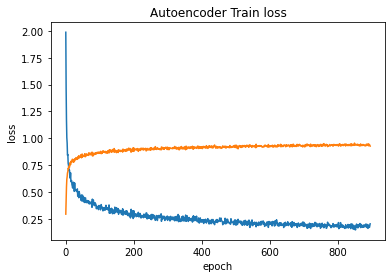

In [ ]:

from keras.layers import LeakyReLU, Softmax, ReLU
drpRate1=0.2
drpRate=0.3
np.random.seed(seed)

input_dim=encoded_data_train.shape[1]
input_layer2=Input(shape=(input_dim,),name='inputNN')
hidden1=BatchNormalization()(input_layer2)  
hidden2=Dropout(drpRate1, seed=seed)(hidden1)
hidden3=Dense(200,activation=None)(hidden2)
hidden30=ReLU(name='lrc')(hidden3)
hidden4=BatchNormalization()(hidden30)
hidden5=Dropout(drpRate, seed=seed)(hidden4)
output2=Dense(5, name='outputNN')(hidden5)
softmax=Softmax()(output2)
classifier=Model(inputs=input_layer2,outputs=softmax)
print(classifier.summary())

adam=Adam(lr=0.00002)
classifier.compile(optimizer=adam, loss='categorical_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', min_delta = 0.001, mode='min', verbose=1,patience=50)  
# Fit the model
history=classifier.fit(encoded_data_train,Y_train_res,epochs=895,batch_size=8,shuffle=True,    
                      #validation_data = (encoded_data_val, Y_val),
                      #callbacks=[es],
                      verbose=2)
                
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Autoencoder Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train loss', 'train acc', 'val loss', 'val acc'], loc='upper right')
plt.show()

In [ ]:
score=classifier.evaluate(encoded_data_train,Y_train_res)
print("\nTraining Accuracy %s: %.2f%%" % (classifier.metrics_names[1], score[1]*100))

'''
score=classifier.evaluate(encoded_data_val,Y_val) 
print("\nValidation Accuracy %s: %.2f%%" % (classifier.metrics_names[1], score[1]*100))

encoded_data=encoder2.predict(X_train1)

score=classifier.evaluate(encoded_data,Y_train1) 
print("\nTesting Accuracy %s: %.2f%%" % (classifier.metrics_names[1], score[1]*100))
''' 

1440/1440 [==============================] - 0s 135us/step

Training Accuracy accuracy: 98.06%


'\nscore=classifier.evaluate(encoded_data_val,Y_val) \nprint("\nValidation Accuracy %s: %.2f%%" % (classifier.metrics_names[1], score[1]*100))\n\nencoded_data=encoder2.predict(X_train1)\n\nscore=classifier.evaluate(encoded_data,Y_train1) \nprint("\nTesting Accuracy %s: %.2f%%" % (classifier.metrics_names[1], score[1]*100))\n'

In [ ]:
model_json=classifier.to_json()
with open("results/classifier.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
encoded_data=encoder2.predict(X_train1)
y_pred=classifier.predict(encoded_data)
y_pred=np.argmax(y_pred,axis=-1).reshape(-1,1)
y_true=np.argmax(Y_train1,axis=-1).reshape(-1,1)

cm=confusion_matrix(y_pred,y_true)
cm.T

array([[ 87,   0,   0,   0,   0],
       [  1,  30,   0,   0,   0],
       [  0,   1, 268,   7,  12],
       [  0,   0,   9, 118,   0],
       [  2,   0,   0,   0,  85]])

     |████████████████████████████████| 1.3 MB 4.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


<Figure size 432x288 with 0 Axes>

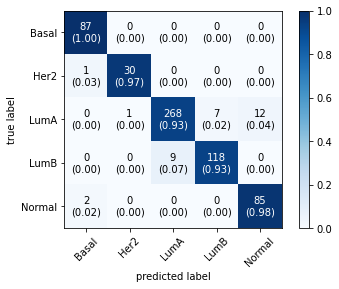

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
!pip install mlxtend --upgrade --no-deps 
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
plt.figure()
fig, ax = plot_confusion_matrix(conf_mat=cm.T,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True, class_names = ['Basal', 'Her2', 'LumA', 'LumB', 'Normal'])
#plt.show()
#plt.savefig('/content/drive/My Drive/autoencoder/BRCA/CMPhase1.png', bbox_inches = 'tight', dpi = 600)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        87
           1       0.74      1.00      0.85        31
           2       0.92      0.84      0.88       288
           3       0.80      0.84      0.82       127
           4       0.84      0.93      0.88        87

   micro avg       0.88      0.88      0.88       620
   macro avg       0.85      0.92      0.88       620
weighted avg       0.88      0.88      0.88       620



In [ ]:

input_data = Input(shape=(X.shape[1],))

encoder_layer1=encoder2.layers[1]
encoder_layer2=encoder2.layers[2]
encoder_layer3=encoder2.layers[3]
encoder_layer4=encoder2.layers[4]
encoder_layer5=encoder2.layers[5]
encoder_layer6=encoder2.layers[6]


encoder_layer13 = classifier.layers[1]
encoder_layer14 = classifier.layers[2]
encoder_layer15 = classifier.layers[3]
encoder_layer16 = classifier.layers[4]
encoder_layer17 = classifier.layers[5]
encoder_layer18 = classifier.layers[6]
encoder_layer19 = classifier.layers[7]
encoder_layer20 = classifier.layers[8]



encoder = Model(input_data, encoder_layer20(encoder_layer19(encoder_layer18(encoder_layer17(encoder_layer16(encoder_layer15(encoder_layer14(encoder_layer13(
    encoder_layer6(encoder_layer5(encoder_layer4(encoder_layer3(encoder_layer2(encoder_layer1(input_data))))))
    )))))))))

encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 22382)             0         
_________________________________________________________________
dense_100 (Dense)            (None, 5000)              111915000 
_________________________________________________________________
re_lu_1 (ReLU)               (None, 5000)              0         
_________________________________________________________________
dense_101 (Dense)            (None, 2000)              10002000  
_________________________________________________________________
re_lu_2 (ReLU)               (None, 2000)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 500)               1000500   
_________________________________________________________________
re_lu_3 (ReLU)               (None, 500)               0   

In [ ]:
final=encoder
final_json=final.to_json()
with open("./models/CombinedModel_Seed"+str(seed)+".json","w") as json_file:
  json_file.write(final_json)

final.save_weights("./models/CombinedModel_Seed"+str(seed)+".h5")

## Loading Saved Model

In [ ]:
tf.reset_default_graph()

In [ ]:
from keras.models import model_from_json

with open("./models/CombinedModel_Seed"+str(seed)+".json", 'r') as json_file:
    encoder= json_file.read()

In [ ]:
encoder = keras.models.model_from_json(encoder)
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 22382)             0         
_________________________________________________________________
dense_100 (Dense)            (None, 5000)              111915000 
_________________________________________________________________
re_lu_1 (ReLU)               (None, 5000)              0         
_________________________________________________________________
dense_101 (Dense)            (None, 2000)              10002000  
_________________________________________________________________
re_lu_2 (ReLU)               (None, 2000)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 500)               1000500   
_________________________________________________________________
re_lu_3 (ReLU)               (None, 500)               0   

In [ ]:
encoder.load_weights("./models/CombinedModel_Seed"+str(seed)+".h5")

## XAI

In [ ]:
from kneed import KneeLocator
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
from deepexplain.tensorflow import DeepExplain
from collections import Counter
model = encoder
for method in ['deeplift', 'intgrad', 'grad*input', 'elrp']: 
          
          with DeepExplain(session=K.get_session()) as de:  # <-- init DeepExplain context
              #model
              input_tensor = model.layers[0].input
              fModel = Model(inputs=input_tensor, outputs = model.layers[-2].output)
              target_tensor = fModel(input_tensor) 
              for i,subtype in enumerate(['Basal', 'Her2', 'LumA', 'LumB', 'Normal']):
                      IG={}
                      mask = Y_onehot[:,i]==1
                      xs = X[mask]
                      ys = Y_onehot[mask]
                      
                      attributions_ig= de.explain(method, target_tensor, input_tensor, xs, ys=ys)
                      
                      data=np.asarray(attributions_ig)
                      data1 = pd.DataFrame(data, columns=df.columns)
                      
                      genes_union_pos, genes_union_neg = [], []
                      for index, row in data1.iterrows():
                                                 
                        pos = row[row > 0]
                        neg = row[row < 0]*-1
                        
                        indexes=np.argsort(pos)[::-1]
                        genespos=pos.index[indexes]
                        relpos=pos.iloc[indexes]
                        kneedle_pos = KneeLocator(range(len(relpos)), relpos, S=1.0, curve="convex", direction="decreasing")
                        
                        indexes=np.argsort(neg)[::-1]
                        genesneg=neg.index[indexes]
                        relneg=neg.iloc[indexes]
                        kneedle_neg = KneeLocator(range(len(relneg)), relneg, S=1.0, curve="convex", direction="decreasing")
                        
                        #kneedle_pos.plot_knee()
                        #print(kneedle_pos.knee, kneedle_neg.knee)
                        #kneedle_neg.plot_knee()
                        
                        #if kneedle_pos.knee < 20 or kneedle_pos.knee > 500:
                        #  print(kneedle_pos.knee, method, subtype, 'pos')
                        #if kneedle_neg.knee < 20 or kneedle_neg.knee > 500:
                        #  print(kneedle_neg.knee, method, subtype, 'neg')
                        
                        genes_union_pos.extend(list(relpos.head(kneedle_pos.knee).index))
                        genes_union_neg.extend(list(relneg.head(kneedle_neg.knee).index))
                        

                      genes_count_pos = dict(Counter(genes_union_pos))
                      genes_count_neg = dict(Counter(genes_union_neg))

                      freq_pos = dict(sorted(genes_count_pos.items(), key=lambda item: item[1], reverse=True))
                      freq_df_pos = pd.DataFrame(freq_pos.items(), columns=[subtype+'Genes', 'Frequency'])
                      freq_neg = dict(sorted(genes_count_neg.items(), key=lambda item: item[1], reverse=True))
                      freq_df_neg = pd.DataFrame(freq_neg.items(), columns=[subtype+'Genes', 'Frequency'])
                     
                      final_pos = freq_df_pos  #[freq_df_pos['Frequency'] >= round(data1.shape[0]*.2)]
                      print(method, subtype, final_pos.shape, 'pos')
                      final_neg = freq_df_neg  #[freq_df_neg['Frequency'] >= round(data1.shape[0]*.2)]
                      print(method, subtype, final_neg.shape, 'neg')

                      final_pos.to_csv('./Attributions new/seed'+str(seed)+'/'+method+'_'+str(subtype)+'_pos.csv')
                      final_neg.to_csv('./Attributions new/seed'+str(seed)+'/'+method+'_'+str(subtype)+'_neg.csv')
              #bottom100.T.plot.bar()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


deeplift Basal (2269, 2) pos
deeplift Basal (2353, 2) neg
deeplift Her2 (1369, 2) pos
deeplift Her2 (1508, 2) neg
deeplift LumA (2827, 2) pos
deeplift LumA (3475, 2) neg
deeplift LumB (2668, 2) pos
deeplift LumB (3001, 2) neg
deeplift Normal (1228, 2) pos
deeplift Normal (1316, 2) neg
intgrad Basal (2265, 2) pos
intgrad Basal (2264, 2) neg
intgrad Her2 (1138, 2) pos
intgrad Her2 (1313, 2) neg
intgrad LumA (3019, 2) pos
intgrad LumA (3271, 2) neg
intgrad LumB (2984, 2) pos
intgrad LumB (2815, 2) neg
intgrad Normal (1231, 2) pos
intgrad Normal (1463, 2) neg
grad*input Basal (3058, 2) pos
grad*input Basal (2897, 2) neg
grad*input Her2 (1430, 2) pos
grad*input Her2 (1626, 2) neg
grad*input LumA (4702, 2) pos
grad*input LumA (4560, 2) neg
grad*input LumB (3698, 2) pos
grad*input LumB (3942, 2) neg
grad*input Normal (1791, 2) pos
grad*input Normal (1943, 2) neg
elrp Basal (2713, 2) pos
elrp Basal (2965, 2) neg
elrp Her2 (1717, 2) pos
elrp Her2 (1657, 2) neg
elrp LumA (4604, 2) pos
elrp LumA 

In [ ]:
from collections import Counter
model = encoder
import shap

for i, subtype in enumerate(['Basal', 'Her2', 'LumA', 'LumB', 'Normal']):
  #print(subtype)
  mask = Y_onehot[:,i]==1
  xs = X[mask]
  ys = Y_onehot[mask]
  explainer = shap.GradientExplainer(((model.layers[0].input, model.layers[-2].output)), xs)
  shap_values = explainer.shap_values(xs, ranked_outputs=1, rseed=seed)
  data1 = pd.DataFrame(np.array(shap_values[0][0]), columns = df.columns)
  
  genes_union_pos, genes_union_neg = [], []
  for index, row in data1.iterrows():
    
    pos = row[row > 0]
    neg = row[row < 0]*-1
    
    indexes=np.argsort(pos)[::-1]
    genespos=pos.index[indexes]
    relpos=pos.iloc[indexes]
    kneedle_pos = KneeLocator(range(len(relpos)), relpos, S=1.0, curve="convex", direction="decreasing")
    
    indexes=np.argsort(neg)[::-1]
    genesneg=neg.index[indexes]
    relneg=neg.iloc[indexes]
    kneedle_neg = KneeLocator(range(len(relneg)), relneg, S=1.0, curve="convex", direction="decreasing")
                        
    #kneedle_pos.plot_knee()
    #print(kneedle_pos.knee, kneedle_neg.knee)
    #kneedle_neg.plot_knee()

    #if kneedle_pos.knee < 20 or kneedle_pos.knee > 500:
    #  print(kneedle_pos.knee, subtype, 'pos')
    #if kneedle_neg.knee < 20 or kneedle_neg.knee > 500:
    #  print(kneedle_neg.knee, subtype, 'neg')
                    
    genes_union_pos.extend(list(relpos.head(kneedle_pos.knee).index))
    genes_union_neg.extend(list(relneg.head(kneedle_neg.knee).index))

  genes_count_pos = dict(Counter(genes_union_pos))
  genes_count_neg = dict(Counter(genes_union_neg))
    
  freq_pos = dict(sorted(genes_count_pos.items(), key=lambda item: item[1], reverse=True))
  freq_df_pos = pd.DataFrame(freq_pos.items(), columns=[subtype+'Genes', 'Frequency'])
  freq_neg = dict(sorted(genes_count_neg.items(), key=lambda item: item[1], reverse=True))
  freq_df_neg = pd.DataFrame(freq_neg.items(), columns=[subtype+'Genes', 'Frequency'])
                    
  final_pos = freq_df_pos  #[freq_df_pos['Frequency'] >= round(data1.shape[0]*.2)]
  print('grad shap', subtype, final_pos.shape, 'pos')
  final_neg = freq_df_neg  #[freq_df_neg['Frequency'] >= round(data1.shape[0]*.2)]
  print('grad shap', subtype, final_neg.shape, 'neg')
  final_pos.to_csv('./Attributions new/seed'+str(seed)+'/'+'grad_shap'+'_'+str(subtype)+'_pos.csv')
  final_neg.to_csv('./Attributions new/seed'+str(seed)+'/'+'grad_shap'+'_'+str(subtype)+'_neg.csv')

grad shap Basal (3352, 2) pos
grad shap Basal (3095, 2) neg
grad shap Her2 (1999, 2) pos
grad shap Her2 (1856, 2) neg
grad shap LumA (5047, 2) pos
grad shap LumA (4803, 2) neg
grad shap LumB (4442, 2) pos
grad shap LumB (4037, 2) neg
grad shap Normal (2604, 2) pos
grad shap Normal (2881, 2) neg


In [ ]:
model = encoder
import shap

for i, subtype in enumerate(['Basal', 'Her2', 'LumA', 'LumB', 'Normal']):
  #print(subtype)
  mask = Y_onehot[:,i]==1
  xs = X[mask]
  ys = Y_onehot[mask]
  explainer = shap.DeepExplainer(((model.layers[0].input, model.layers[-2].output)), xs)
  shap_values = explainer.shap_values(xs, ranked_outputs=1)
  data1 = pd.DataFrame(np.array(shap_values[0][0]), columns = df.columns)
  
  genes_union_pos, genes_union_neg = [], []
  for index, row in data1.iterrows():
    
    pos = row[row > 0]
    neg = row[row < 0]*-1
    
    indexes=np.argsort(pos)[::-1]
    genespos=pos.index[indexes]
    relpos=pos.iloc[indexes]
    kneedle_pos = KneeLocator(range(len(relpos)), relpos, S=1.0, curve="convex", direction="decreasing")
    
    indexes=np.argsort(neg)[::-1]
    genesneg=neg.index[indexes]
    relneg=neg.iloc[indexes]
    kneedle_neg = KneeLocator(range(len(relneg)), relneg, S=1.0, curve="convex", direction="decreasing")
                        
    #kneedle_pos.plot_knee()
    #print(kneedle_pos.knee, kneedle_neg.knee)
    #kneedle_neg.plot_knee()
    
    #if kneedle_pos.knee < 20 or kneedle_pos.knee > 500:
    #  print(kneedle_pos.knee, subtype, 'pos')
    #if kneedle_neg.knee < 20 or kneedle_neg.knee > 500:
    #  print(kneedle_neg.knee, subtype, 'neg')
                    
    genes_union_pos.extend(list(relpos.head(kneedle_pos.knee).index))
    genes_union_neg.extend(list(relneg.head(kneedle_neg.knee).index))

  genes_count_pos = dict(Counter(genes_union_pos))
  genes_count_neg = dict(Counter(genes_union_neg))
    
  freq_pos = dict(sorted(genes_count_pos.items(), key=lambda item: item[1], reverse=True))
  freq_df_pos = pd.DataFrame(freq_pos.items(), columns=[subtype+'Genes', 'Frequency'])
  freq_neg = dict(sorted(genes_count_neg.items(), key=lambda item: item[1], reverse=True))
  freq_df_neg = pd.DataFrame(freq_neg.items(), columns=[subtype+'Genes', 'Frequency'])
                    
  final_pos = freq_df_pos  #[freq_df_pos['Frequency'] >= round(data1.shape[0]*.2)]
  print('deep shap', subtype, final_pos.shape, 'pos')
  final_neg = freq_df_neg  #[freq_df_neg['Frequency'] >= round(data1.shape[0]*.2)]
  print('deep shap', subtype, final_neg.shape, 'neg')
  final_pos.to_csv('./Attributions new/seed'+str(seed)+'/'+'deep_shap'+'_'+str(subtype)+'_pos.csv')
  final_neg.to_csv('./Attributions new/seed'+str(seed)+'/'+'deep_shap'+'_'+str(subtype)+'_neg.csv')

deep shap Basal (3327, 2) pos
deep shap Basal (2981, 2) neg
deep shap Her2 (2031, 2) pos
deep shap Her2 (1901, 2) neg
deep shap LumA (4990, 2) pos
deep shap LumA (4896, 2) neg
deep shap LumB (4272, 2) pos
deep shap LumB (4171, 2) neg
deep shap Normal (2708, 2) pos
deep shap Normal (2692, 2) neg
